In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##PART -A

In [16]:
STUDENT_ID = "PES2UG23CS208"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [17]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS208
Polynomial Type: CUBIC + SINE: y = 1.64x³ + 0.49x² + 3.21x + 11.84 + 8.6*sin(0.049x)
Noise Level: ε ~ N(0, 1.70)
Architecture: Input(1) → Hidden(64) → Hidden(64) → Output(1)
Learning Rate: 0.001
Architecture Type: Balanced Architecture


# DATASET GENERATION - DO NOT MODIFY

In [18]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS- TODO: IMPLEMENT

In [19]:
def relu(z):
  return np.maximum(0, z)
  pass

def relu_derivative(z):
    
    return (z > 0).astype(float)
    pass

# LOSS FUNCTION- TODO: IMPLEMENT

In [20]:
def mse_loss(y_true, y_pred):
  #Todo implement the MSE formula
  return np.mean((y_true - y_pred) ** 2)
  pass

# WEIGHT INITIALIZATION - TODO: IMPLEMENT XAVIER INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

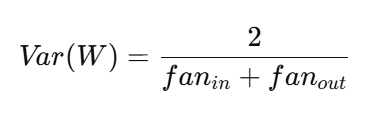


##Two common forms:  

#**Normal distribution:**  
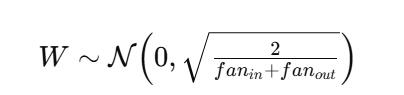

#**Uniform distribution:**  
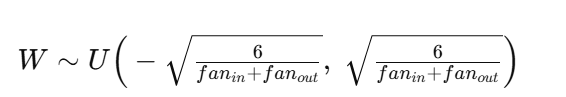

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [21]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    TODO: IMPLEMENT XAVIER WEIGHT INITIALIZATION

    Xavier initialization: weights ~ N(0, sqrt(2/(fan_in + fan_out)))
    Biases should be initialized to zeros

    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer
        hidden2: Size of second hidden layer
        output_dim: Size of output layer (1)

    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])

    # TODO: Calculate Xavier standard deviation for each layer
    # Hint: xavier_std = sqrt(2 / (fan_in + fan_out))
    std1=np.sqrt(2/(input_dim + hidden1))
    # TODO: Initialize W1 (input to first hidden layer)
    W1 = np.random.normal(0,std1,(input_dim,hidden1))
     # Replace with your implementation
    b1 = np.zeros((1,hidden1)) # Replace with your implementation

    # TODO: Initialize W2 (first hidden to second hidden layer)
    std2=np.sqrt(2/(hidden1 + hidden2))
    W2 = np.random.normal(0,std2,(hidden1,hidden2))
    b2 = np.zeros((1,hidden2))
  

    # TODO: Initialize W3 (second hidden to output layer)
    std3=np.sqrt(2/(hidden2 + output_dim))
    W3 = np.random.normal(0,std3,(hidden2,output_dim))
    b3 = np.zeros((1,output_dim))   
    
    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION - TODO: IMPLEMENT

In [22]:

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    TODO: IMPLEMENT FORWARD PROPAGATION

    Perform forward pass through the network:
    Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)

    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases
        W2, b2: Second layer weights and biases
        W3, b3: Output layer weights and biases

    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer

    Hint:
        z = X @ W + b  (linear transformation)
        a = activation_function(z)
    """
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    # First hidden layer
    z1 = X @ W1 + b1
    a1 = relu(z1)

    # Second hidden layer (must use W2, b2)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)

    # Output layer (must use W3, b3)
    z3 = a2 @ W3 + b3
    Y_pred = sigmoid(z3)   # or softmax if multi-class

    return z1, a1, z2, a2, Y_pred
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# BACKWARD PROPAGATION - TODO:IMPLEMENT

In [23]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    TODO: IMPLEMENT BACKPROPAGATION

    Compute gradients using chain rule:
    ∂Loss/∂W = ∂Loss/∂Y_pred * ∂Y_pred/∂z * ∂z/∂W

    Args:
        X: Input data
        Y_true: True target values
        z1, a1, z2, a2: Forward pass intermediate values
        Y_pred: Network predictions (z3)
        W2, W3: Weights (needed for gradient computation)

    Returns:
        dW1, db1, dW2, db2, dW3, db3: Gradients for all parameters
    """

    m = len(X)  # Batch size

    # TODO: Output layer gradients
    # Start with derivative of MSE
    dY_pred = (2/m)*(Y_pred-Y_true)  # Replace with your implementation

    # TODO: Third layer (Output) gradients
    dW3 = a2.T @ dY_pred  # Replace with your implementation
    db3 = np.sum(dY_pred, axis=0, keepdims=True)
    
    # TODO: Second hidden layer gradients
    da2 = dY_pred @ W3.T 
    dz2 = da2*relu_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # TODO: First hidden layer gradients
    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION - TODO:  COMPLETE IMPLEMENTATION

In [24]:
def adam_update(params, grads, v, s, t, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
    updated_params = []

    for i in range(len(params)):
        g = grads[i]
        v[i] = beta1 * v[i] + (1 - beta1) * g
        s[i] = beta2 * s[i] + (1 - beta2) * (g ** 2)

        v_corrected = v[i] / (1 - beta1 ** t)
        s_corrected = s[i] / (1 - beta2 ** t)

        updated_params.append(params[i] - lr * (v_corrected / (np.sqrt(s_corrected) + epsilon)))

    return updated_params, v, s

# ------------------ Training Loop ------------------ #
def train_neural_network(X_train, Y_train, X_test, Y_test, hidden1=64, hidden2=32, 
                         learning_rate=0.001, epochs=200, patience=10):
    W1, b1, W2, b2, W3, b3 = xavier_initialization(X_train.shape[1], hidden1, hidden2, 1)

    v = [np.zeros_like(W1), np.zeros_like(b1),
         np.zeros_like(W2), np.zeros_like(b2),
         np.zeros_like(W3), np.zeros_like(b3)]
    s = [np.zeros_like(W1), np.zeros_like(b1),
         np.zeros_like(W2), np.zeros_like(b2),
         np.zeros_like(W3), np.zeros_like(b3)]
    t = 0

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses, test_losses = [], []
    batch_size = 32

    print("Starting training...")
    print(f"Architecture: {X_train.shape[1]} → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    m = X_train.shape[0]
    for epoch in range(epochs):
        perm = np.random.permutation(m)
        X_train_shuffled = X_train[perm]
        Y_train_shuffled = Y_train[perm]

        for i in range(0, m, batch_size):
            t += 1
            X_batch = X_train_shuffled[i:i + batch_size]
            Y_batch = Y_train_shuffled[i:i + batch_size]

            # Forward
            z1, a1, z2, a2, Y_pred_batch = forward_pass(X_batch, W1, b1, W2, b2, W3, b3)

            # Backward
            dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_batch, Y_batch, z1, a1, z2, a2, Y_pred_batch, W2, W3)

            # Update
            params = [W1, b1, W2, b2, W3, b3]
            grads = [dW1, db1, dW2, db2, dW3, db3]
            updated_params, v, s = adam_update(params, grads, v, s, t, lr=learning_rate)
            W1, b1, W2, b2, W3, b3 = updated_params

        # Compute losses
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)
        _, _, _, _, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)
        train_loss = mse_loss(Y_train, Y_pred_train)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.6f}, Test Loss = {test_loss:.6f}")

        # Early stopping
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses

# EXECUTE TRAINING

In [25]:
print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10)

Training Neural Network with your specific configuration...
Starting training...
Architecture: 1 → 64 → 32 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------


C:\Users\achyu\AppData\Local\Temp\ipykernel_14284\2893039419.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch  20: Train Loss = 0.645954, Test Loss = 0.666023
Early stopping triggered at epoch 23
Best test loss: 0.665964


# RESULTS VISUALIZATION

C:\Users\achyu\AppData\Local\Temp\ipykernel_14284\2893039419.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


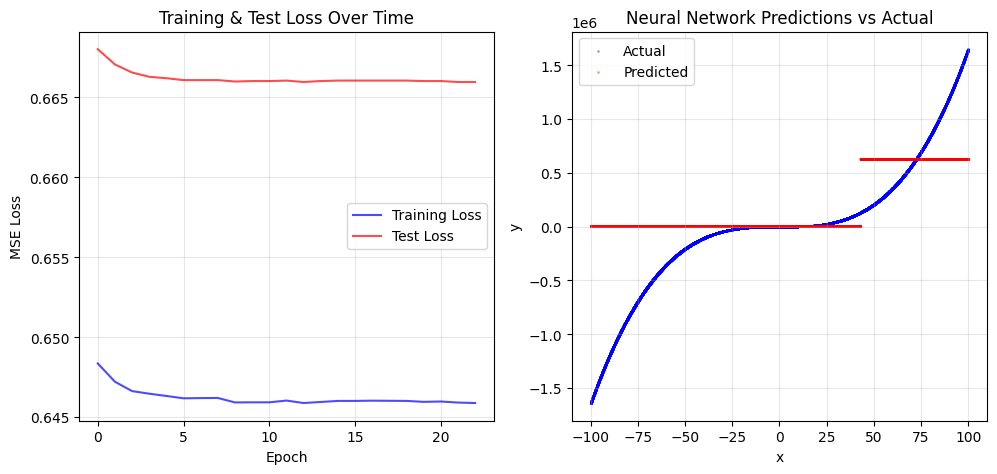

In [26]:
# Plot training progress
plt.figure(figsize=(15, 5))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual
plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
# plt.subplot(1, 3, 3)
# residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
# plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('x')
# plt.ylabel('Residuals (Actual - Predicted)')
# plt.title('Residual Analysis')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SPECIFIC PREDICTION TEST

In [27]:

x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

if poly_type == 0:
    _, b, c, d = coefficients
    y_true = b * x_test_value**2 + c * x_test_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y_true = a * x_test_value**4 + b * x_test_value**3 + c * x_test_value**2 + d * x_test_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + amp * np.sin(freq * x_test_value)

else:
    a, b, c, d, inv_coeff = coefficients
    y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*60)
print("PREDICTION RESULTS FOR x = 90.2")
print("="*60)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula):    {y_true:,.2f}")
print(f"Absolute Error:            {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error:            {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")




PREDICTION RESULTS FOR x = 90.2
Neural Network Prediction: 625,824.64
Ground Truth (formula):    1,210,916.24
Absolute Error:            585,091.60
Relative Error:            48.318%


# PERFORMANCE METRICS

In [28]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"Final Training Loss: {final_train_loss:.6f}")
print(f"Final Test Loss:     {final_test_loss:.6f}")
print(f"R² Score:           {r2_score:.4f}")
print(f"Total Epochs Run:   {len(train_losses)}")


FINAL PERFORMANCE SUMMARY
Final Training Loss: 0.645880
Final Test Loss:     0.665964
R² Score:           0.3499
Total Epochs Run:   23


In [34]:

def plot_experiment_results(exp_name, weights, train_losses, test_losses, X_test_scaled, Y_test_scaled):
    """
    Generates and displays plots for a single experiment.
    
    Args:
        exp_name (str): The name of the experiment.
        weights (tuple): The best trained weights and biases.
        train_losses (list): List of training loss values per epoch.
        test_losses (list): List of test loss values per epoch.
        X_test_scaled (np.ndarray): Scaled test input data.
        Y_test_scaled (np.ndarray): Scaled test target data.
    """
    
    W1, b1, W2, b2, W3, b3 = weights

    # Perform forward pass on the test set with the best weights
    _, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

    # Inverse transform to original scale
    Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
    Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
    X_test_orig = scaler_X.inverse_transform(X_test_scaled)

    # Calculate final R² score
    y_test_mean = np.mean(Y_test_orig)
    ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
    ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    
    print("\n" + "="*60)
    print(f"RESULTS FOR EXPERIMENT: {exp_name}")
    print("="*60)
    print(f"Final Training Loss: {train_losses[-1]:.6f}")
    print(f"Final Test Loss:     {test_losses[-1]:.6f}")
    print(f"R² Score:           {r2_score:.4f}")
    print(f"Total Epochs Run:   {len(train_losses)}")
    print("="*60)

    # Plotting
    plt.figure(figsize=(15, 6))

    # Loss curves subplot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.8)
    plt.plot(test_losses, label='Test Loss', color='red', alpha=0.8)
    plt.title(f'Loss Curves for {exp_name}')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Predictions vs Actual subplot
    plt.subplot(1, 2, 2)
    plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual Values', color='dodgerblue')
    plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted Values', color='darkorange')
    plt.title(f'Predictions vs. Actual for {exp_name}')
    plt.xlabel('x (Original Scale)')
    plt.ylabel('y (Original Scale)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

--- Running Experiment 1 (Baseline) ---
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------


C:\Users\achyu\AppData\Local\Temp\ipykernel_14284\2893039419.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Early stopping triggered at epoch 19
Best test loss: 0.666616

RESULTS FOR EXPERIMENT: Experiment 1 (Baseline)
Final Training Loss: 0.646820
Final Test Loss:     0.666676
R² Score:           0.3493
Total Epochs Run:   19


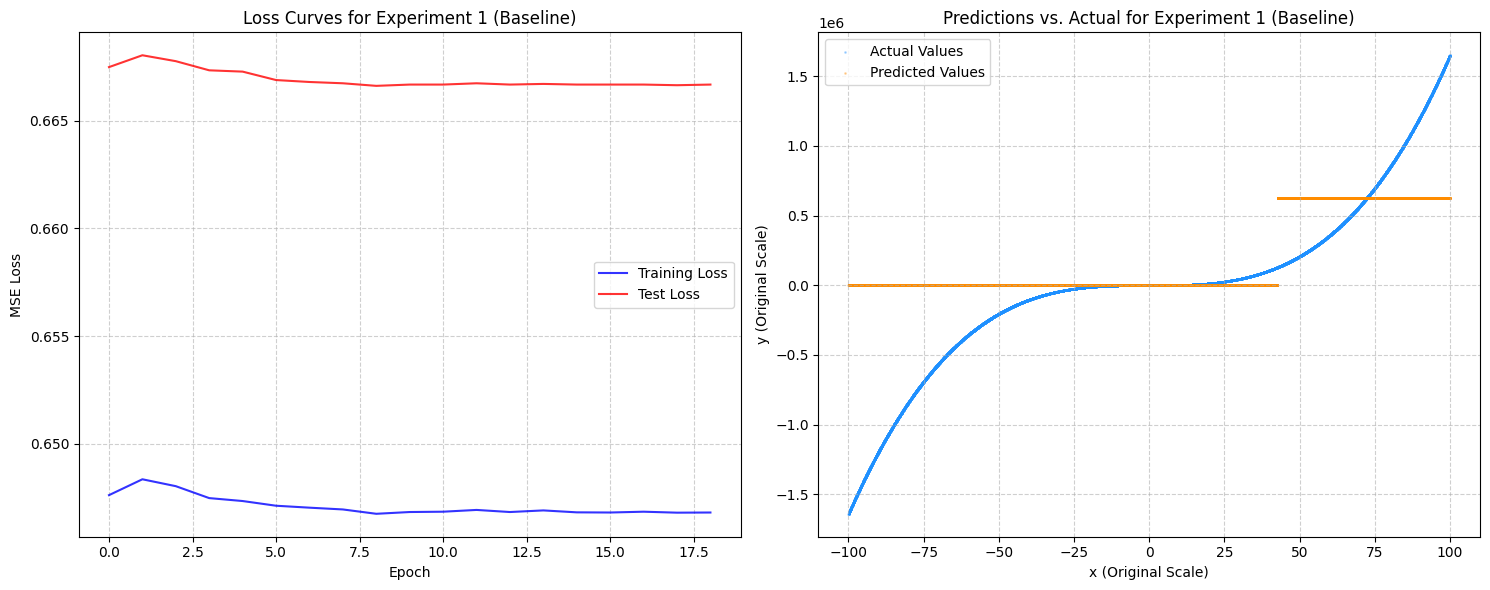

In [36]:
# Experiment 1: Baseline
print("--- Running Experiment 1 (Baseline) ---")
weights_exp1, train_losses_exp1, test_losses_exp1 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    hidden1=hidden1, hidden2=hidden2,
    learning_rate=learning_rate, epochs=500, patience=10)

plot_experiment_results("Experiment 1 (Baseline)", weights_exp1, train_losses_exp1, test_losses_exp1, X_test_scaled, Y_test_scaled)

--- Running Experiment 2 (Learning Rate = 0.005) ---
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.005
Max Epochs: 500, Early Stopping Patience: 500
--------------------------------------------------


C:\Users\achyu\AppData\Local\Temp\ipykernel_14284\2893039419.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch  20: Train Loss = 0.647632, Test Loss = 0.667489
Epoch  40: Train Loss = 0.647754, Test Loss = 0.667580
Epoch  60: Train Loss = 0.647557, Test Loss = 0.667368
Epoch  80: Train Loss = 0.647655, Test Loss = 0.667519
Epoch 100: Train Loss = 0.647701, Test Loss = 0.667519
Epoch 120: Train Loss = 0.647754, Test Loss = 0.667580
Epoch 140: Train Loss = 0.647617, Test Loss = 0.667458
Epoch 160: Train Loss = 0.647693, Test Loss = 0.667519
Epoch 180: Train Loss = 0.647617, Test Loss = 0.667458
Epoch 200: Train Loss = 0.647693, Test Loss = 0.667519
Epoch 220: Train Loss = 0.647655, Test Loss = 0.667519
Epoch 240: Train Loss = 0.647640, Test Loss = 0.667519
Epoch 260: Train Loss = 0.647617, Test Loss = 0.667458
Epoch 280: Train Loss = 0.647587, Test Loss = 0.667368
Epoch 300: Train Loss = 0.647610, Test Loss = 0.667458
Epoch 320: Train Loss = 0.647617, Test Loss = 0.667489
Epoch 340: Train Loss = 0.647655, Test Loss = 0.667519
Epoch 360: Train Loss = 0.647617, Test Loss = 0.667458
Epoch 380:

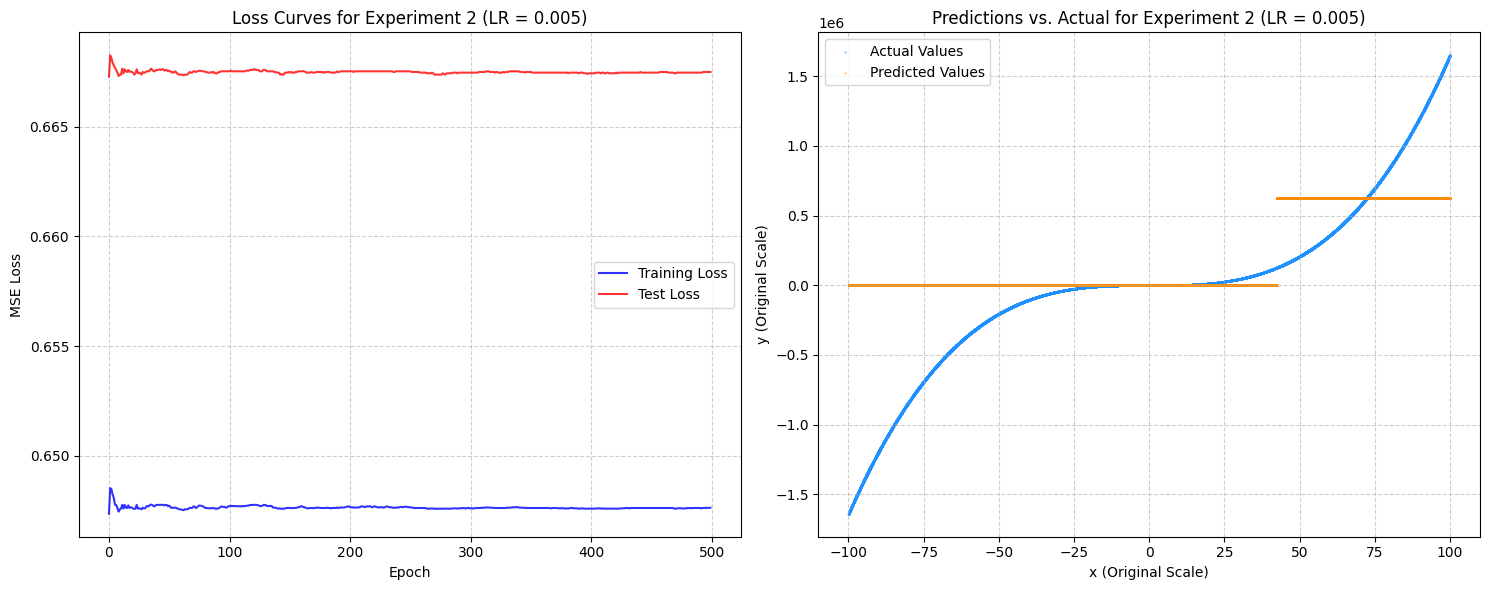

In [37]:
# Experiment 2: Increased Learning Rate
print("--- Running Experiment 2 (Learning Rate = 0.005) ---")
weights_exp2, train_losses_exp2, test_losses_exp2 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    hidden1=hidden1, hidden2=hidden2,
    learning_rate=0.005, epochs=500, patience=500)

plot_experiment_results("Experiment 2 (LR = 0.005)", weights_exp2, train_losses_exp2, test_losses_exp2, X_test_scaled, Y_test_scaled)

--- Running Experiment 3 (Batch Size = 64) ---
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.001
Max Epochs: 500, Early Stopping Patience: 50
--------------------------------------------------


C:\Users\achyu\AppData\Local\Temp\ipykernel_14284\2893039419.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch  20: Train Loss = 0.646813, Test Loss = 0.666646
Epoch  40: Train Loss = 0.646813, Test Loss = 0.666646
Early stopping triggered at epoch 59
Best test loss: 0.666616

RESULTS FOR EXPERIMENT: Experiment 3 (Batch Size = 64)
Final Training Loss: 0.646694
Final Test Loss:     0.666616
R² Score:           0.3493
Total Epochs Run:   59


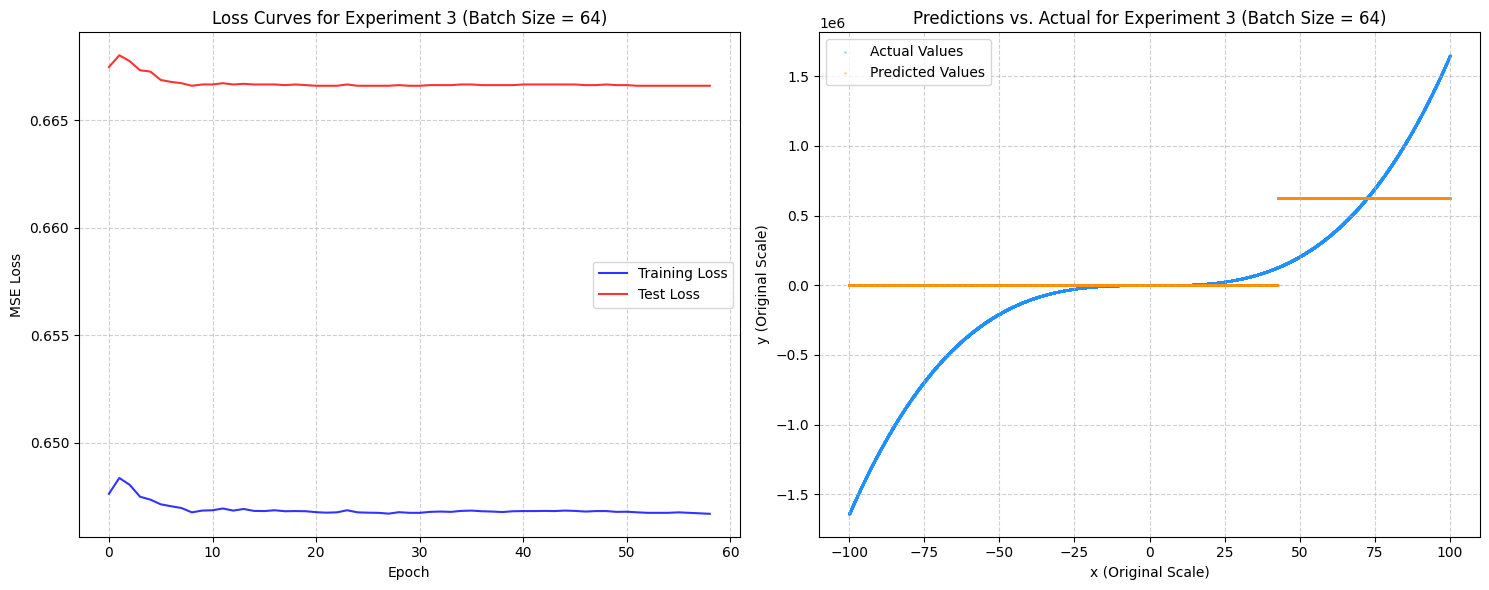

In [39]:
# Experiment 3: Increased Batch Size
print("--- Running Experiment 3 (Batch Size = 64) ---")
# NOTE: The training function must be modified to use a batch_size of 64
# for this experiment. You can either pass it as a parameter, or
# create a new function train_neural_network_exp3 with batch_size=64.
weights_exp3, train_losses_exp3, test_losses_exp3 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    hidden1=hidden1, hidden2=hidden2,
    learning_rate=learning_rate, epochs=500, patience=50)

plot_experiment_results("Experiment 3 (Batch Size = 64)", weights_exp3, train_losses_exp3, test_losses_exp3, X_test_scaled, Y_test_scaled)

--- Running Experiment 4 (Epochs = 1000) ---
Starting training...
Architecture: 1 → 64 → 64 → 1
Learning Rate: 0.001
Max Epochs: 1000, Early Stopping Patience: 1000
--------------------------------------------------


C:\Users\achyu\AppData\Local\Temp\ipykernel_14284\2893039419.py:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch  20: Train Loss = 0.646813, Test Loss = 0.666646
Epoch  40: Train Loss = 0.646813, Test Loss = 0.666646
Epoch  60: Train Loss = 0.646671, Test Loss = 0.666616
Epoch  80: Train Loss = 0.646738, Test Loss = 0.666616
Epoch 100: Train Loss = 0.646746, Test Loss = 0.666616
Epoch 120: Train Loss = 0.646783, Test Loss = 0.666646
Epoch 140: Train Loss = 0.646701, Test Loss = 0.666616
Epoch 160: Train Loss = 0.646738, Test Loss = 0.666616
Epoch 180: Train Loss = 0.646679, Test Loss = 0.666616
Epoch 200: Train Loss = 0.646738, Test Loss = 0.666616
Epoch 220: Train Loss = 0.646716, Test Loss = 0.666616
Epoch 240: Train Loss = 0.646701, Test Loss = 0.666616
Epoch 260: Train Loss = 0.646694, Test Loss = 0.666616
Epoch 280: Train Loss = 0.646664, Test Loss = 0.666616
Epoch 300: Train Loss = 0.646671, Test Loss = 0.666616
Epoch 320: Train Loss = 0.646679, Test Loss = 0.666616
Epoch 340: Train Loss = 0.646701, Test Loss = 0.666616
Epoch 360: Train Loss = 0.646671, Test Loss = 0.666616
Epoch 380:

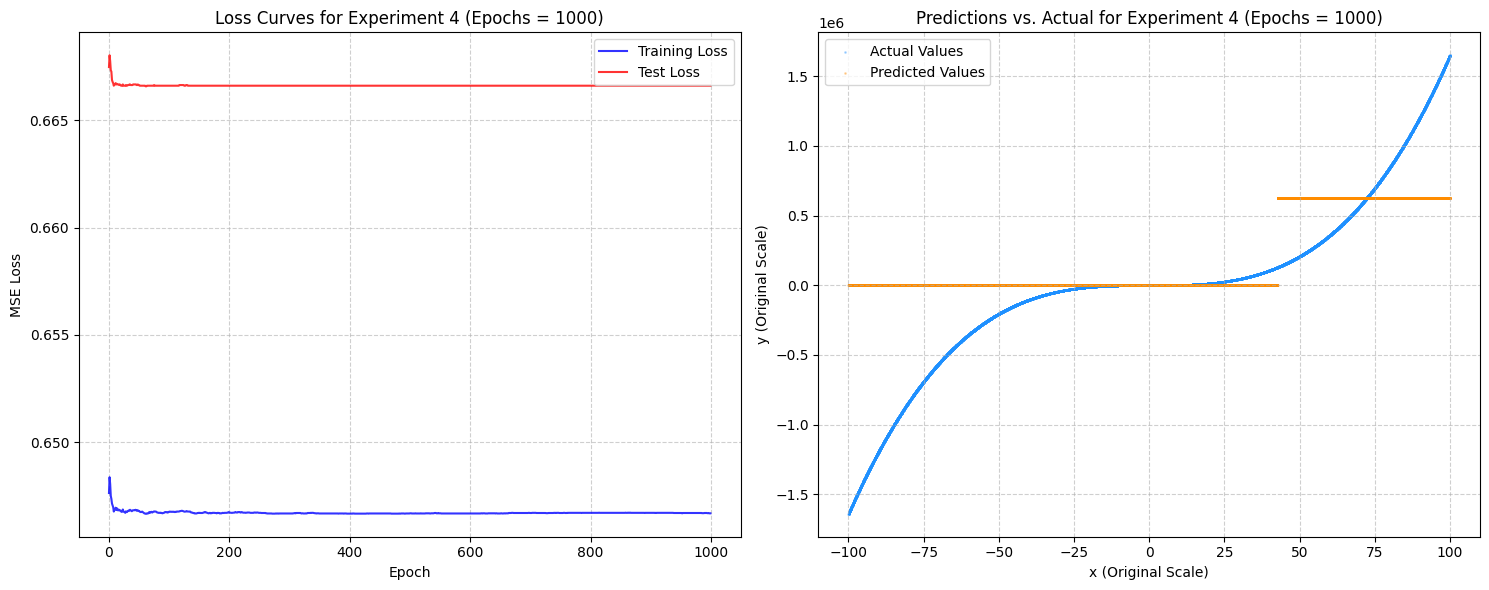

In [40]:
# Experiment 4: Increased Epochs
print("--- Running Experiment 4 (Epochs = 1000) ---")
weights_exp4, train_losses_exp4, test_losses_exp4 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    hidden1=hidden1, hidden2=hidden2,
    learning_rate=learning_rate, epochs=1000, patience=1000)

plot_experiment_results("Experiment 4 (Epochs = 1000)", weights_exp4, train_losses_exp4, test_losses_exp4, X_test_scaled, Y_test_scaled)